### replace default value of argument (e.g. `gamma`, `hi_min`) to defined values in module file

### Test for several set of initial values

## How can I find those kind of `t0+1/x0` singular point .. where propagation is not possible .. although,, in Bohm, there is always solution if started from regular point -- thus, small enough stepsize always exist to

# compare implicit and explicit Euler

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.size'] = 15

In [2]:
from bohm.ode.euler import get_stepsize, back_euler

from bohm.sampling import quantile

In [3]:
from tdse.analytic.state import Gaussian1D, gradient_Gaussian1D, laplacian_Gaussian1D

A1, A2 = 1.0, 1.0
kx1, kx2 = 0.0, 0.0
xc1, xc2 = -1.0, 1.0
t01, t02 = -1.0, 0.0
def psi(t,x): return A1 * Gaussian1D(x-xc1,t-t01,kx1) + A2 * Gaussian1D(x-xc2,t-t02,kx2)
def dxpsi(t,x): return A1 * gradient_Gaussian1D(x-xc1,t-t01,kx1) + A2 * gradient_Gaussian1D(x-xc2,t-t02,kx2)
def dx2psi(t,x): return A1 * laplacian_Gaussian1D(x-xc1,t-t01,kx1) + A2 * laplacian_Gaussian1D(x-xc2,t-t02,kx2)

def Fx(t,x): return (dxpsi(t,x) / psi(t,x)).imag
def dxFx(t,x): return (dx2psi(t,x)/psi(t,x) - (dxpsi(t,x)/psi(t,x))**2).imag

t0 = -3
t_max = 3

x_arr = np.linspace(-2,2,50)

quant_arr = np.linspace(0.05, 0.95, 19)
prob0_arr = np.square(np.abs(psi(t0, x_arr)))
x0_arr = quantile(x_arr, prob0_arr, quant_arr)
# x0_arr = np.linspace(-3, 1, 30)

assert np.all(np.abs(psi(t0, x0_arr)) != 0)

t_arr = np.linspace(t0, t_max, 30)
x_t_arr = np.empty((t_arr.size, x0_arr.size), dtype=float)
x_t_arr[0,:] = x0_arr

h_max, gamma, h_min = 0.005, 0.5, 0.0001

for i in range(x0_arr.size):
    _, xp_arr = back_euler(t0, x0_arr[i], t_max, Fx, dxFx, h_max, 
                          t_arr=t_arr, gamma=gamma, hi_min=h_min)
    x_t_arr[:,i] = xp_arr

In [4]:
# figs, axs = plt.subplots()

# # x_arr = np.linspace(x0_arr.min(), x0_arr.max())
# axs.plot(x_arr, np.square(np.abs(psi(t0, x_arr))))
# axs.vlines(x0_arr, 0, 1)

In [5]:
from vis.plot import construct_catesian_mesh_for_pcolormesh

xt_min, xt_max = x_t_arr.min(), x_t_arr.max()
xt_len = xt_max - xt_min
xlim = (xt_min - 0.2 * xt_len, xt_max + 0.2 * xt_len)

t_grid_vals = np.linspace(t0, t_max, 50)
x_grid_vals = np.linspace(*xlim, 50)
T_grid, X_grid = construct_catesian_mesh_for_pcolormesh(t_grid_vals, x_grid_vals)
T, X = np.meshgrid(t_grid_vals, x_grid_vals, indexing='ij')

In [6]:
from matplotlib.colors import LogNorm, Normalize

psi_val = psi(T, X)
C = np.square(np.abs(psi_val))
vmax = C.max()
vmin = vmax * pow(10, -1.4)

# norm = LogNorm(vmin, vmax)
norm = Normalize(vmin, vmax)

# [DONE] Implement sampling from the initial distribution

# Optimize each routine, especially in terms of derivative evaluation

Text(0, 0.5, 'x / a.u.')

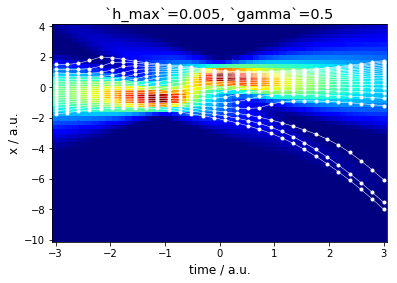

In [7]:
fig, ax = plt.subplots()

ax.pcolormesh(T_grid, X_grid, C, cmap='jet', norm=norm)

for i in range(x0_arr.size):
    l_num, = ax.plot(t_arr, x_t_arr[:,i], '.-', color='white', linewidth=0.5)

ax.set_xlim(T_grid.min(), T_grid.max())
ax.set_ylim(X_grid.min(), X_grid.max())

ax.set_title("`h_max`={}, `gamma`={}".format(h_max, gamma))
ax.set_xlabel("time / a.u.")
ax.set_ylabel("x / a.u.")

In [9]:
# fig.savefig("step-esti-two-gaussian-A1-{}-A2-{}-t01-{}-t02-{}-hmax-{}-gamma-{}-with-map-test-0.png".format(A1, A2, t01, t02, h_max,gamma))